### Reading Data

### XGBoost

In [5]:
%pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 1.3/124.9 MB 2.6 MB/s eta 0:00:48
    --------------------------------------- 2.1/124.9 MB 2.9 MB/s eta 0:00:43
    --------------------------------------- 2.6/124.9 MB 2.8 MB/s eta 0:00:44
   - -------------------------------------- 3.4/124.9 MB 2.9 MB/s eta 0:00:43
   - -------------------------------------- 3.9/124.9 MB 2.8 MB/s eta 0:00:43
   - -------------------------------------- 4.5/124.9 MB 2.8 MB/s eta 0:00:44
   - -------------------------------------- 5.2/124.9 MB 2.8 MB/s eta 0:00:43
   - -------------------------------------- 5.8/124.9 MB 2.8 MB/s eta 0:00:44
   -- ------------------------------------- 6.3/124.9 MB 2.8 MB/s eta 0:00:43
   -- ------------------------------------- 7.3/124.9 MB 2.9 MB/s eta 0:00:41

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("booking_train.csv")

In [4]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [6]:
X=df.drop(columns=["id","booking_status"])

In [7]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [8]:
Y=df["booking_status"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [10]:
m=df.isna().sum()
m[m>0]

Series([], dtype: int64)

In [11]:
df.duplicated().sum()

np.int64(0)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


numpipe=make_pipeline(SimpleImputer(strategy="median"),StandardScaler()).set_output(transform="pandas")

<Axes: xlabel='booking_status'>

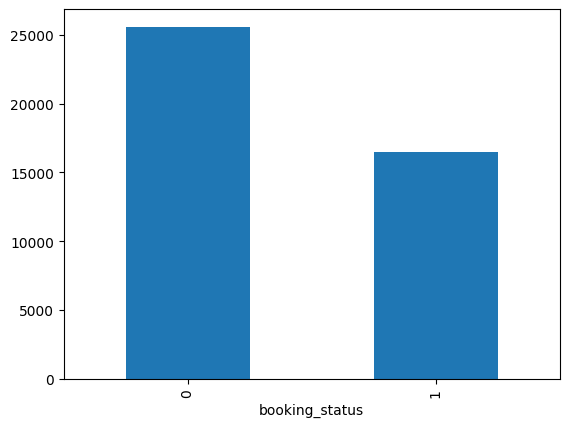

In [13]:
Y.value_counts().plot(kind="bar")

In [16]:
X_pre=numpipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Apply Train Test Split

In [17]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [18]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [19]:
ytrain.head()

15559    0
32783    0
11797    1
39750    1
28711    1
Name: booking_status, dtype: int64

In [20]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [21]:
ytest.head()

8768     0
38340    1
7104     0
36898    0
9747     0
Name: booking_status, dtype: int64

In [22]:
xtrain.shape

(33680, 17)

In [23]:
xtest.shape

(8420, 17)

### Step 6- Model Building
XGBoost _hyperparameter tuning is not required

In [24]:
import xgboost  as xgb
model=xgb.XGBClassifier(max_depth=3,n_estimators=200)
model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Step 7- Model Evaluation

In [25]:
model.score(xtrain,ytrain)

0.8330166270783848

In [26]:
model.score(xtest,ytest)

0.8226840855106888

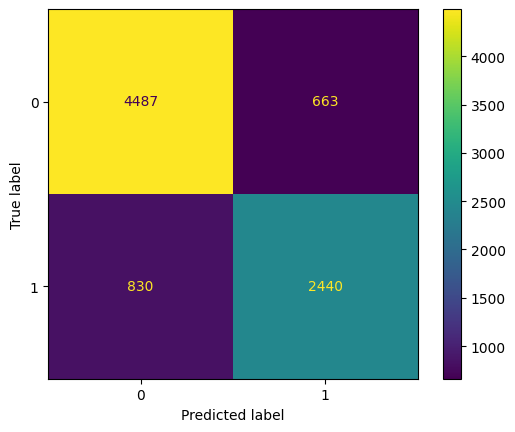

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

In [28]:
ypred_test=model.predict(xtest)
ypred_test[0:5]

array([0, 1, 0, 0, 0])

In [29]:
ytest.head()

8768     0
38340    1
7104     0
36898    0
9747     0
Name: booking_status, dtype: int64

In [30]:
from sklearn.metrics import classification_report


print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      5150
           1       0.79      0.75      0.77      3270

    accuracy                           0.82      8420
   macro avg       0.82      0.81      0.81      8420
weighted avg       0.82      0.82      0.82      8420



In [32]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,xtrain,ytrain,cv=5,scoring="f1_macro")
scores

array([0.80990153, 0.81082435, 0.80896891, 0.81334739, 0.8076819 ])

In [33]:
scores.mean()

np.float64(0.8101448144968568)

# ROC Receiver Operative Characteristics
# AUC Area Under The Curve

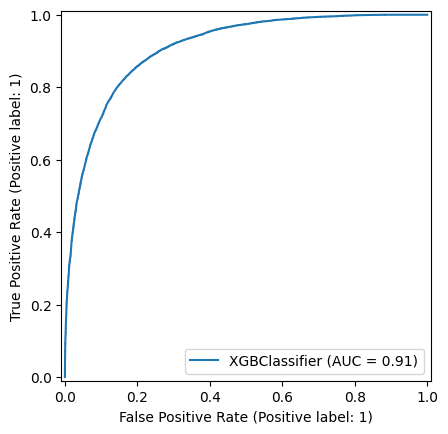

In [34]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model,xtrain,ytrain)

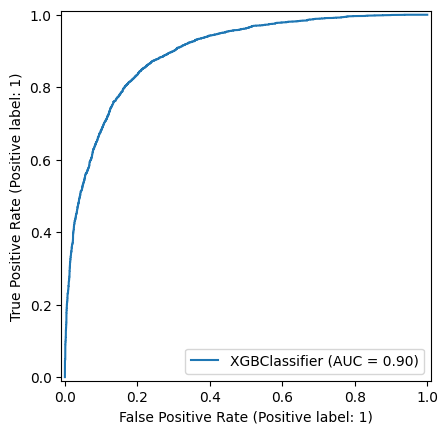

In [35]:
from turtle import mode


RocCurveDisplay.from_estimator(model,xtest,ytest)

In [36]:
roc_score=cross_val_score(model,xtrain,ytrain,cv=5,scoring="roc_auc")
roc_score

array([0.89237133, 0.89545953, 0.89400779, 0.89618646, 0.89151453])

In [37]:
roc_score.mean()

np.float64(0.8939079266419231)

### Feature Importance

In [38]:
imp=pd.Series(model.feature_importances_,index=xtrain.columns)

<Axes: >

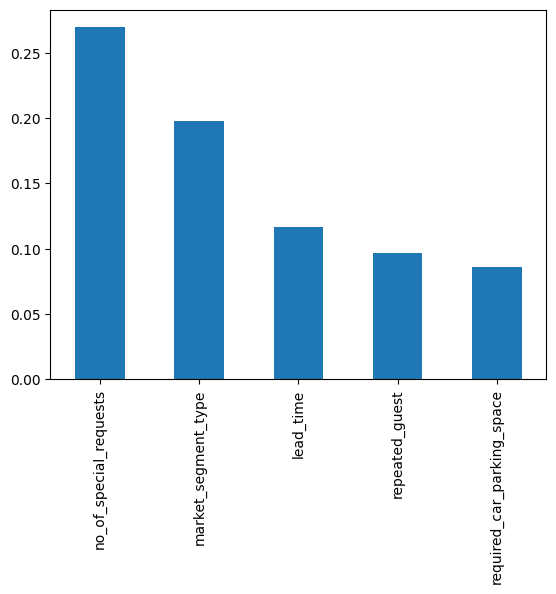

In [41]:
imp.sort_values(ascending=False)[0:5].plot(kind="bar")

In [42]:
xnew=pd.read_csv("booking_test.csv")

In [43]:
xnew

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [46]:
xnew2=xnew.copy()
xnew2=xnew2.drop(columns="id")

In [47]:
xnew2_pre=numpipe.transform(xnew2)

In [48]:
xnew2_pre

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,2.604122,0.409661,0.497095,1.585992,0.428551,-0.173408,-0.060506,-0.101479,1.492610,-0.737691
28064,0.151040,-0.313454,1.259332,-0.278849,-0.407020,-0.160945,-0.515173,-0.282330,0.409661,-1.623525,1.023466,-1.149928,-0.173408,-0.060506,-0.101479,-1.065367,0.552579
28065,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,-0.788076,0.409661,0.850531,0.685950,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
28066,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,-1.232145,0.409661,0.497095,-1.114133,0.428551,-0.173408,-0.060506,-0.101479,1.566656,-0.737691


In [49]:
preds=model.predict(xnew2_pre)

In [50]:
preds[0:5]

array([0, 0, 0, 0, 0])

In [51]:
probs=model.predict_proba(xnew2_pre)[:,1]
probs[0:5]

array([0.09120524, 0.07939062, 0.36544427, 0.06069286, 0.48449335],
      dtype=float32)

In [57]:
res=xnew[["id"]]

In [58]:
res

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [59]:
res["booking_predicted"]=preds
res["prob"]=probs


In [61]:
res=res.round(4)

In [62]:
res

,id,booking_predicted,prob
0,42100,0,0.0912
1,42101,0,0.0794
2,42102,0,0.3654
3,42103,0,0.0607
4,42104,0,0.4845
...,...,...,...
28063,70163,1,0.9359
28064,70164,0,0.0417
28065,70165,0,0.1226
28066,70166,0,0.4257


In [64]:
res["booking_predicted"].value_counts()

booking_predicted
0    17849
1    10219
Name: count, dtype: int64

<Axes: xlabel='booking_predicted'>

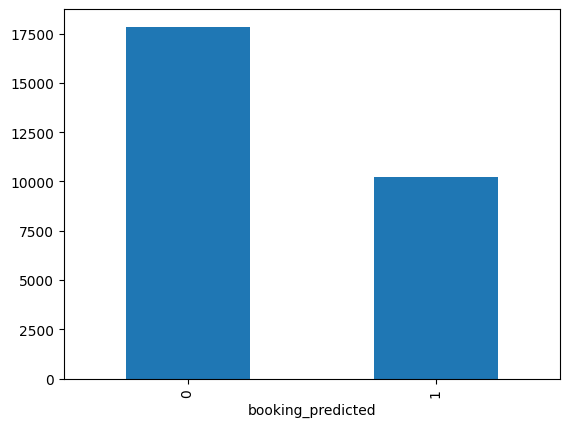

In [65]:
res["booking_predicted"].value_counts().plot(kind="bar")

In [66]:
res.to_csv("xgbresults.csv",index=False)

In [67]:
import joblib

In [68]:
joblib.dump(numpipe,"num.joblib")

['num.joblib']

In [70]:
joblib.dump(model,"xgb.joblib")

['xgb.joblib']

In [71]:
joblib.load("xgb.joblib")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
joblib.load("num.joblib")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])